<a href="https://colab.research.google.com/github/EnriqueZR/Fall_2021/blob/main/Tarea_2_Micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esta tarea utilizaremos como base de datos la Encuesta Nacional de Ingreso y Gasto de los Hogares (ENIGH), que es una de las bases principales recabadas por INEGI. Esta encuesta se usa para generar estimaciones de desigualdad y de equipamiento de los hogares. Tambi ́en se emplea para entender c ́omo los hogares distribuyen su gasto, entre otras cosas. En esta tarea exploraremos la desigualdad de salarios entre hombres y mujeres con datos de 2020.


In [ ]:
install.packages('read.csv')

In [ ]:
#Paquetes necesarios:
install.packages('tidyverse')
install.packages('stargazer')
install.packages('haven')

In [ ]:
install.packages('stats')
install.packages('car')
install.packages('sandwich')

In [ ]:
library('tidyverse')
library('stargazer')
library('haven')
library('stats')
library('car')
library('sandwich')

In [ ]:
#Primero descargamos la base de datos
datos_enigh<-as.data.frame(read.csv("/content/enigh_tarea.csv", header = TRUE))

In [ ]:
#Cargamos la base de datos en R 
#setwd("~/Desktop/tarea2_microa_plicada")
#datos_enigh <- read.csv("enigh_tarea.csv")
df_enigh <- as.data.frame(datos_enigh)


#1. Vamos a iniciar realizando una comparación del salario de los hombres y las mujeres en México.






(a) Construye dos variables dummy, una para los datos que pertenecen a los hombres (llámala hombre) y otra para los datos que pertenecen a las mujeres (llámala mujer). Reporta la media del salario de los hombres y de las mujeres. Grafica utilizando un histograma la distribución de los salarios de los hombres y las mujeres.

In [ ]:

#Creamos una dummy para hombre y mujer
df_enigh <- datos_enigh %>% mutate(hombre = ifelse(sexo ==1,1,0) ) %>% mutate(mujer = ifelse(sexo ==2,1,0) )
names(df_enigh)
################################################
#Ajustamos la base a las variables que vamos a usar
df_enigh <- df_enigh %>% 
  dplyr::select(sexo, ing_tri, habla_ind, hrs_trab, edad, num_trabaj, 
                escolaridad_yrs, hrs_qh, hombre, mujer, tm_40hrs)
#Vamos a contar los NA
summary(df_enigh) #máximo se van a tirar 8204 missing values (NA)
df_enigh <- na.omit(df_enigh)



In [ ]:
install.packages('plyr')

In [ ]:
library(plyr)

In [ ]:
#Creamos una dummy para hombre y mujer pero ahora como factor
df_enigh$sex_factor = ifelse(df_enigh$sexo ==1,"Hombre","Mujer")
names(df_enigh)
#Media
ingreso_promedio_sx <- ddply(df_enigh, "sex_factor", summarise, ing.tri.mean=mean(ing_tri))
ingreso_promedio_sx
#Mediana
#cdat2 <- ddply(df_enigh, "sex_factor", summarise, ing.tri.medi=median(ing_tri))
#cdat2


[1] "sexo"            "ing_tri"         "habla_ind"       "hrs_trab"       
 [5] "edad"            "num_trabaj"      "escolaridad_yrs" "hrs_qh"         
 [9] "hombre"          "mujer"           "tm_40hrs"        "sex_factor"

sex_factor,ing.tri.mean
<chr>,<dbl>
Hombre,21357.44
Mujer,16700.97


In [ ]:
#Diferencia en porcentajes del ingreso trimestral promedio de hombres y mujeres para responder la 1_b)
(4656.47*100)/16700.97


[1] 27.88143

# RESPUESTA_P1_(A): historgrama de abajo. 

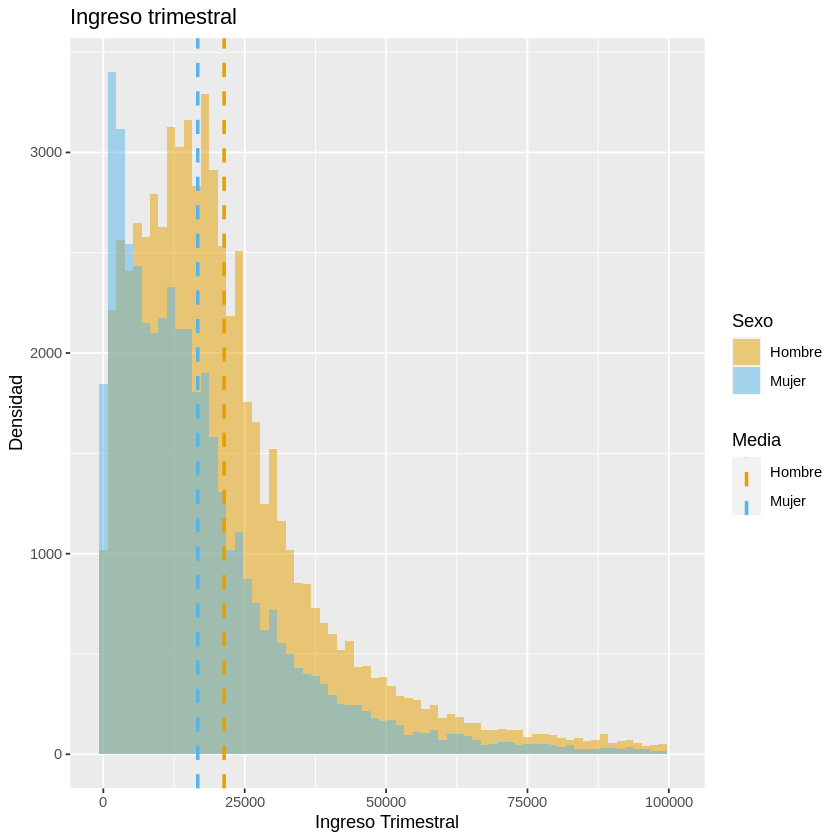

In [ ]:
# Overlaid histograms with means
ggplot(df_enigh, aes(x=ing_tri, fill=sex_factor)) +
  geom_histogram(binwidth=1500, alpha=.5, position="identity") +
  geom_vline(data=ingreso_promedio_sx, aes(xintercept=ing.tri.mean,  colour=sex_factor),
             linetype="dashed", size=1)  + 
  scale_fill_manual(values = c("#E69F00", "#56B4E9"), name ="Sexo") +
  scale_color_manual(values = c("#E69F00", "#56B4E9"), name ="Media") +
  ggtitle("Ingreso trimestral") + ylab("Densidad") + xlab("Ingreso Trimestral")

(b) Estima la siguiente especificación:

$ln(ing  _- trim_{i})=\beta_{0}+\beta_{1}mujer+U_{i}$



In [ ]:
p1b_reg1 <- lm(log(ing_tri)~ mujer, df_enigh)
p1b_reg1 
stargazer(p1b_reg1, type = "text",
          covariate.labels = c("Mujer"),
          column.labels = c("Logarítmo del ingreso trimestral"), out="tabla1reg.txt")


Call:
lm(formula = log(ing_tri) ~ mujer, data = df_enigh)

Coefficients:
(Intercept)        mujer  
     9.6010      -0.4108  



                          Dependent variable:       
                    --------------------------------
                              log(ing_tri)          
                    Logarítmo del ingreso trimestral
----------------------------------------------------
Mujer                          -0.411***            
                                (0.007)             
                                                    
Constant                        9.601***            
                                (0.004)             
                                                    
----------------------------------------------------
Observations                    107,896             
R2                               0.032              
Adjusted R2                      0.032              
Residual Std. Error       1.109 (df = 107894)       
F Statistic          3,579.639*** (df = 1; 107894)  
Note:                    *p<0.1; **p<0.05; ***p<0.01


##¿Cómo se comparan los resultados de tu estimación con los resultados del inciso anterior?

# **RESPUESTA_P1_B):** 
# La b1 de nuestra regresión nos dice que el ingreso promedio trimestral de las mujeres en México es 41.1% menor que el ingreso promedio de los hombres.

# La diferencia de la estimacion respecto a la diferencia de promedios es mayor, ya que si solo comparamos los promedios de ingreso trimestral las mujeres ganan 27.88% menos que los hombres tomando a los hombres como referencia. 









(c) Cuando evaluamos la significancia estadísitica de la diferencia de medias es muy común encontrar esta fórmula:

#$t = \frac{\bar{X}_{H}-\bar{X}_{M}}{\sqrt{\frac{S^{2}_{H}}{N_{H}}+\frac{S^{2}_{M}}{N_{M}}}}$






donde $X_{H}$ y $X_{M}$ representan la media de hombres y mujeres (de salarios en este caso), $S^{2}_{H}$ y $S^{2}_{M}$  representan la varianza de X para hombres y mujeres, y $N_{H}$ y $N_{M}$ representan el número de observaciones de hombres y mujeres.



(i) Explica por qué el denominador de la ecuación (1) representa una varianza heterocedástica.


## **RESPUESTA_P1_C) (i):** Es una varianza heterocedastica porque las varianzas del ingreso trimestral de los hombres y las muejres son distintas, además, los tamaños de la muestra son diferentes. 



(ii) Si en vez de utilizar dicha varianza heterocedástica quisieras utilizar una homocedástica, ¿cómo modificarías la ecuación (1)? Hazlo y compara los valores que obtienes de dichas varianzas.





#$t = \frac{\bar{X}_{H}-\bar{X}_{M}}{\sqrt{\frac{S^{2}_{H}}{N_{H}}+\frac{S^{2}_{M}}{N_{M}}}}$

## RESPUESTA_P1_C(ii): Lo que haria es usar la diferencia de promedios que obtuvimos en la parte (a) y la parte de la varianza en lugar de usar dos partes usaria la varianza completa de la muestra, la que no divide por género:

# $t = \frac{\bar{X}_{H}-\bar{X}_{M}}{\sqrt{\frac{S^{2}_{MT}}{N_{MT}}}}$




In [ ]:
# P1_C) (ii) 

var_hete <- (var(df_enigh$ing_tri[df_enigh$hombre==1])/67803) + (var(df_enigh$ing_tri[df_enigh$mujer==1])/48096)
var_hom <- var(df_enigh$ing_tri)/(115899)
var_hete
var_hom

#La varianza heterocedastica es muy grande

[1] 9524.594

[1] 2418.091

iii) Utiliza bootstrap para evaluar si ambas varianzas (la homocedástica y heterocedástica) son distintas. Emplea 1,000 repeticiones. Indica claramente cuál es el valor-p que obtienes de dicha evaluación y las conclusiones a las que llegas.

In [ ]:
  #[1] Boostrap para la varianza heterocedastica
   var_boots_h1=function(muestra){
         muestra_n = sample_n(muestra, 115899, replace = TRUE)
         var_h1=(var(muestra_n$ing_tri[muestra_n$hombre==1])/67803)
          +(var(muestra_n$ing_tri[muestra_n$mujer==1])/48096)
          return(var_h1)
       }

p1_var_h1 <- as.data.frame(replicate(1000, var_boots_h1(df_enigh)))

p1_var_h1 <- p1_var_h1|>
 mutate(var_h1=replicate(1000, var_boots_h1(df_enigh))) |>
 select(var_h1)

In [ ]:
   #[2] Boostrap para la varianza homocedastica
 var_boots_h0=function(muestra){
         muestra_n = sample_n(muestra, 115899, replace = TRUE)
         var_h0=(var(muestra_n$ing_tri)/115899)
          return(var_h0)
       }



p1_var_h0 <- as.data.frame(replicate(1000, var_boots_h0(df_enigh)))

p1_var_h0 <- p1_var_h0|>
 mutate(var_h0=replicate(1000, var_boots_h0(df_enigh))) |>
 select(var_h0)

In [ ]:
  #[3] Prueba F de las varianzas empiricas
var.test(p1_var_h0$var_h0, p1_var_h1$var_h1, ratio=1, alternativa="two.sided", conf.level = 0.95 )



	F test to compare two variances

data:  muchasVarBoots_homo$var_homo and muchasVarBoots_hetero$var_hetero
F = 0.20595, num df = 999, denom df = 999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1819173 0.2331626
sample estimates:
ratio of variances 
         0.2059522 


#RESPUESTA_P1_C(iii):
#En esta prueba F nuestra hipotesis nula es que la varianza homcoedastica y la varianza heterocedastica son iguales y las alternativa que son diferentes.

#El valor-p es muy pequeño  2.2e-16 por lo que podemos concluir  que no podemos rechazar la hipotesis alternativa de que las varianzas empiricas son diferentes. 



## 2. Diferencias de características. 
Desde los 70s, un tema que se ha medido en distintos contextos es la diferencia salarial entre las mujeres y los hombres. Un argumento que justifica la existencia de diferencias salariales es que los hombres y las mujeres tienen características distintas. En este inciso utilizaremos un conjunto de caracter ́ısticas que sospechamos pueden ser, en promedio, distintas entre hombres y mujeres: vivir en un hogar donde algún miembro habla una lengua indígena (habla_ind), horas trabajadas a la semana (hrs_trab), (edad), número de trabajos que tiene el individuo (num_trabaj), años de escolaridad (educ) y horas a la semana dedicadas al que hacer del hogar (hrs_qh). La Tabla 2 describe a mayor detalle estas variables.


a) Utilizando estas características haz una tabla descriptiva que incluya solamente promedios. En las filas de tu tabla debes poner las caracter ́ısticas y debes incluir dos columnas: una para hombres y otra para mujeres. En una tercera columna calcula la diferencia de los promedio y en una cuarta columna calcula el valor-p de esta diferencia. Emplea errores heteroced ́asticos. Agrega asteriscos en la tercera columna para indicar si la diferencia es significativa a los niveles usuales (10%, 5% y 1%).


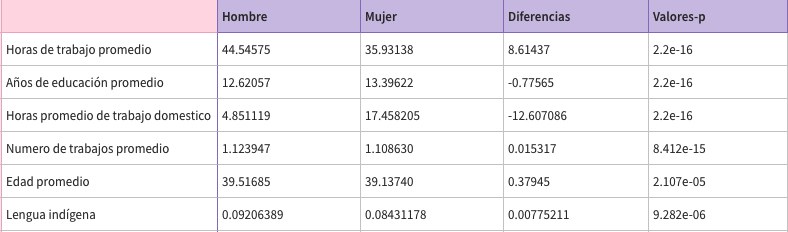






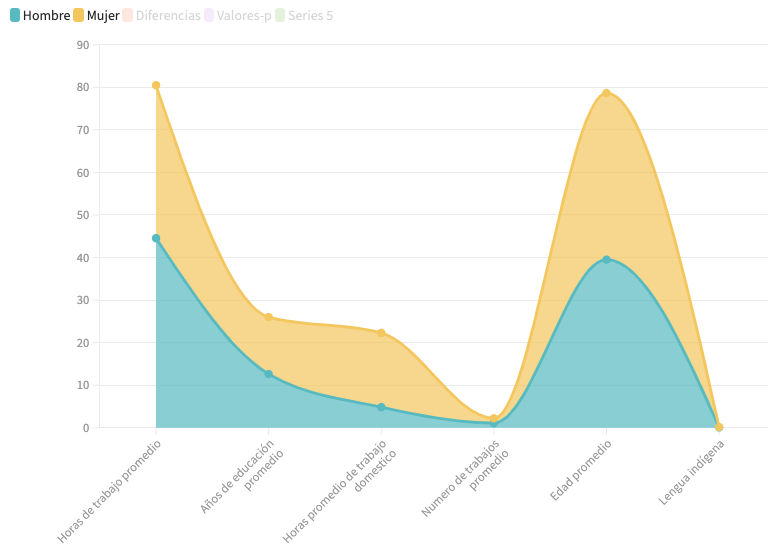

In [ ]:
#Proceso para sacar las medias y las diferencias de medias
#names(df_enigh)
promedios_sx <- ddply(df_enigh, "sex_factor", summarise, hrs_trab_prom=mean(hrs_trab), educ_prom=mean(escolaridad_yrs),
hrs_qh_prom=mean(hrs_qh), num_trabaj_prom=mean(num_trabaj), edad_prom=mean(edad), leng_indg=mean(habla_ind))
promedios_sx

sex_factor,hrs_trab_prom,educ_prom,hrs_qh_prom,num_trabaj_prom,edad_prom,leng_indg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hombre,44.54575,12.62057,4.851119,1.123947,39.51685,0.09206389
Mujer,35.93138,13.39622,17.458205,1.108630,39.13740,0.08431178


In [ ]:
###########################
#Proceso para sacar los valores-p de la diferencia de medias.
###########################
## p-value hrs de trabajo
t.test(df_hombres$hrs_trab, y =df_mujeres$hrs_trab ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)
## p-value numero de trabajo
t.test(df_hombres$num_trabaj, y =df_mujeres$num_trabaj ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.99)
mean(df_hombres$num_trabaj)
mean(df_mujeres$num_trabaj)

## p-value escolaridad
t.test(df_hombres$escolaridad_yrs, y =df_mujeres$escolaridad_yrs ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)

## p-value hrs de qh

t.test(df_hombres$hrs_qh, y =df_mujeres$hrs_qh ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)

       ## p-value hrs de edad

t.test(df_hombres$edad, y =df_mujeres$edad ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)

       ## p-value hrs de habla_ind

t.test(df_hombres$habla_ind, y =df_mujeres$habla_ind ,
       alternative = c("two.sided"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)


	Welch Two Sample t-test

data:  df_hombres$hrs_trab and df_mujeres$hrs_trab
t = 70.851, df = 91412, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 8.376064 8.852672
sample estimates:
mean of x mean of y 
 44.54575  35.93138 



	Welch Two Sample t-test

data:  df_hombres$num_trabaj and df_mujeres$num_trabaj
t = 7.7624, df = 98594, p-value = 8.412e-15
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 0.01023407 0.02039952
sample estimates:
mean of x mean of y 
 1.123947  1.108630 


[1] 1.123947

[1] 1.10863


	Welch Two Sample t-test

data:  df_hombres$escolaridad_yrs and df_mujeres$escolaridad_yrs
t = -30.378, df = 93407, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8257030 -0.7256132
sample estimates:
mean of x mean of y 
 12.62057  13.39622 



	Welch Two Sample t-test

data:  df_hombres$hrs_qh and df_mujeres$hrs_qh
t = -188.59, df = 59918, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.73811 -12.47606
sample estimates:
mean of x mean of y 
 4.851119 17.458205 



	Welch Two Sample t-test

data:  df_hombres$edad and df_mujeres$edad
t = 4.2534, df = 101561, p-value = 2.107e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2046009 0.5543133
sample estimates:
mean of x mean of y 
 39.51685  39.13740 



	Welch Two Sample t-test

data:  df_hombres$habla_ind and df_mujeres$habla_ind
t = 4.4335, df = 97606, p-value = 9.282e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004325001 0.011179227
sample estimates:
 mean of x  mean of y 
0.09206389 0.08431178 


b) (Puntos extra) ¿Se te ocurre una manera de evaluar de forma conjunta las diferencias entre todos los promedios? Realiza este test siendo muy claro acerca de la estimación que estás realizando, la prueba de hipótesis que estas evaluando y sus resultados.

# RESPUESTA P_2b):

# Para esta preba lo que nos interesa conocer es si existe una diferencia significativa entre géneros de los valores promedio de las variables de interes. Usamos una prueba F donde la Yi es la dummy de ser mujer y las variables Xi son las 6 varaibles mencionadas al inicio del problema.

# El resutado de la prueba F conjunta es que el valor-p es muy pequeño 2.2e-16 *** por lo tanto no podemos rechazar la hipotesis alternativa de que existen diferencias significativas en los coeficientes.

In [ ]:
#Hacemos una prueba F conjunta donde la hipotesis nula es que las betas o los coeficientes son iguales
reg_p2b <- lm(mujer ~ escolaridad_yrs+hrs_trab + hrs_qh +num_trabaj+habla_ind +edad 
                 , data = df_enigh)
reg_p2b                 

pf_p2b <- linearHypothesis(reg_p2b , c("escolaridad_yrs", "hrs_trab", "hrs_qh", 
"num_trabaj","habla_ind" ,"edad " ), c(0,0,0,0,0,0), test = "F")
pf_p2b


Call:
lm(formula = mujer ~ escolaridad_yrs + hrs_trab + hrs_qh + num_trabaj + 
    habla_ind + edad, data = df_enigh)

Coefficients:
    (Intercept)  escolaridad_yrs         hrs_trab           hrs_qh  
       0.218532         0.009454        -0.001760         0.022349  
     num_trabaj        habla_ind             edad  
      -0.022048        -0.012032        -0.001437  


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,107895,26109.13,NA,NA,NA,NA
2,107889,18140.08,6,7969.05,7899.383,0


#3. Estimación de regresiones. 
En este inciso utilizaremos las caracter ́ısticas mencio- nadas en la pregunta anterior y las agregaremos como controles. Llena la Tabla 1 que encontrar ́as al final de la tarea.


####**Ojo: Las líneas horizontales en algunas variables (—) significan que NO debes incluir esta variable en la estimación de dicha columna. **

La primera y segunda columna la debes estimar solo con las observaciones de mujeres y hombres, respectivamen- te. Es importante que para propósitos de comparabilidad, el número de observaciones que utilices en tus estimaciones sea homogeneo. Es decir, la suma del número de observaciones de las columnas 1 y 2 debe ser igual al nu ́mero de observaciones de las demás columnas y al nu ́mero de observaciones empleado en las preguntas anteriores. Para esto, debes filtrar tu base de datos para no tener missing values. Utiliza errores heterocedásticos y agrega los asteriscos que indiquen nivel de significancia: * 10%, ** 5% y *** 1%.  [Tip de R: Para estimar errores heteroced ́asticos, utiliza el comando vcovHC de la librer ́ıa sandwich. En dicho comando deberás indicar el nombre con el que guardaste tu estimación lm y errores del tipo HC1 (i.e. vcovHC(nombre modelo,type=’HC1’)). Para crear tablas con resultados de regresiones puedes utilizar el comando stargazer de la librería homónima.]



In [ ]:
#Aqui dividimos la base para responder la P3
df_mujeres <-subset(df_enigh, mujer == 1)
df_hombres <-subset(df_enigh, hombre == 1)


In [ ]:
#### Regresion 1  ###########
reg1_p3 <-lm(ing_tri~escolaridad_yrs + habla_ind + hrs_trab + edad +
           I(edad^2)+num_trabaj+hrs_qh,data=df_mujeres)
se1<-sqrt(diag(vcovHC(reg1_p3,type = 'HC1')))


#### Regresion 2  ###########
reg2_p3 <-lm(ing_tri~escolaridad_yrs + habla_ind + hrs_trab + edad +
           I(edad^2)+num_trabaj+hrs_qh,data=df_hombres)
se2<-sqrt(diag(vcovHC(reg2_p3,type = 'HC1')))

#### Regresion 3  ###########

reg3_p3 <-lm(ing_tri~ mujer + escolaridad_yrs + habla_ind + hrs_trab + edad +
           I(edad^2)+ num_trabaj + hrs_qh,data=df_enigh)
se3<-sqrt(diag(vcovHC(reg3_p3,type = 'HC1')))

#### Regresion 4  ###########


reg4_p3 <-lm(log(ing_tri)~ mujer + escolaridad_yrs + habla_ind + log(hrs_trab) 
         + edad + num_trabaj + hrs_qh,data=df_enigh)
se4<-sqrt(diag(vcovHC(reg4_p3,type = 'HC1')))


#### Regresion 5  ###########

reg5_p3 <-lm( tm_40hrs ~ mujer + escolaridad_yrs + habla_ind + log(hrs_trab) 
          + edad + num_trabaj + hrs_qh,data=df_enigh)
se5<-sqrt(diag(vcovHC(reg5_p3,type = 'HC1')))







## RESPUESTA_P3: Cuadro de abajo:

In [ ]:
#Cuadro de la 3
stargazer(reg1_p3, reg2_p3, reg3_p3, reg4_p3, reg5_p3,
          se=list(se1,se2,se3,se4,se5), 
          type = "text",
          out = "pregunta_3_tabla.txt")


                                                                                    Dependent variable:                                                                 
                    ----------------------------------------------------------------------------------------------------------------------------------------------------
                                                            ing_tri                                                 log(ing_tri)                     tm_40hrs           
                                (1)                          (2)                           (3)                           (4)                           (5)              
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
mujer                                                                                 -3,779.392***                   -0.237***                     -0.030

## 4. Interpretación de Coeficientes. 
Considerando tus respuestas de la pregunta an- terior, interpreta los siguientes coeficientes de la forma m ́as espec ́ıfica posible. (Nota: lleva a cabo la interpretaci ́on del valor estimado de los coeficientes a pesar de que algunos no sean significativos):

# R_P4_a)Un año más de educación aumenta el ingreso en   1,720.053  pesos trimestrales.



# 4_b)Hablar una lengua indigena ceteris paribus reduce tu salario en 2,315.206 pesos trimestrales.



# 4_c) Un aumento marginal(un año) de edad incrementa en promedio tu ingreso en  745.333.



# 4_d)Un aumento de una hora de trabajo incrementa el  ingreso promedio trimestral de las mujeres en  129.241 pesos.


# 4_e)Un aumento de un año de edad incrementa el  ingreso promedio trimestral de las mujeres en  733.851 pesos.



# 4_f)En México las mujeres ganan en promedio trimestral 3,779.392 pesos menos que los hombres. 

 
# 4_g)En México las mujeres ganan en promedio trimestral 23.7% menos que los hombres. 
 

# 4_h) Un increcento de 1% de trabajo es equivalente a un incremento   de 42.7% en el ingreso trimestral.

# 4_i) Un increcento de 1 unidad en el numero de trabajos es equivalente a una disminución de 6.7 puntos porcentuales  en el ingreso trimestral.


 
# 4_j) Un increcento de 1 unidad en el numero de trabajos es equivalente a una disminución de 1.8% en la probabilidad de trabajar más de 40 horas a la semana. 


#4_k) Un increcento de 1% en las horas de trabajo se traduce en un incremento de 42.7% en la probabilidad de trabajar más de 40 horas a la semana. 


#4_l) Las mujeres en Méxcio tienen en promedio un 3% menos de probabilidad de trabajar más de 40 horas a la semana que los hombres. 

# 5. En la pregunta anterior, se te pedía directamente la interpretación del valor estimado de los coeficientes. 

Dicha interpretación está asociada a un incremento de una unidad de la variable X. Sin embargo, este aumento podría ser muy grande o muy pequen ̃o dependiendo de la variable.
 

 a) Para el caso de edad en la columna (3), da una interpretación que est ́e asociada a un aumento de edad que consideres razonable. Explica cómo elegiste este cambio de edad e indica el cambio de ingreso asociado. Si tuviste que hacer algún supuesto adicional, indica cu ́al fue y justifícalo. Haz una descripción del aumento asociado en ingreso que sea f ́acil de entender, incluso para alguien sin mucho conocimiento de econometría. Calcula un intervalo de confianza para este cambio.

 b) Repite el calculo del inciso anterior, pero utilizando la estimaci ́on de la colum- na (4). Si empleaste algu ́n supuesto indica claramente cu ́al fue y justif ́ıcalo. Asegu ́rate que el resultado de ambos incisos sea comparable. (Nota: piensa en qu ́e debes hacer para que el resultado sea comparable dado que en un caso la variable dependiente utiliza logaritmo y en el otro caso no)


##RESPUESTA P_5_Ay B):
Para dar un valor razonable de cambio de edad podemos apoyarnos de la desviación estandar, en el caso se la regresión 3 la desviación para edad es de 13.372. Podemos mejor ajustar a que el cambio sea de 12 años. Ahora ademas del cambio de la desviación suponemos valores para todas las Xi del modelo de tal forma que podamos estimar el cambio salarial a partir del cambio de una desviación estandar en la edad.

Para comparar vamos a suponer que trata de un hombre con 12 años de escolaridad, que trabaja 10 horas diarias, un solo trabajo, dedica 0 y no habla lenguas indigenas.

#Modelo de la regresión 3 y 4 un hombre de 30 años:

 $M_3= 1653.485(12) +   136.871(10) + 30(864.527)+(30^2)(-7.339)-191.690-25503.839=$14845.711

 $M_4= 0.090766(12)-0.008444  (10)+ 0.015946(30)+0.427100(10)+6.413576   = $12.167708 

#Modelo de la regresión 3 y4 un hombre de 18 años:

 $M_3= 1653.485(12) +   136.871(10) + 18(864.527)+(18^2)(-7.339)-191.690-25503.839=$8698.651 

$M_4= 0.090766(12)-0.008444  (10)+ 0.015946(18)+0.427100(10)+6.413576   = $11.976356

Lo que nuetras estimaciones nos dicen es que para un hombre en México con las caracteristicas que mencionamos anteriormente  esperariamos que despúes de 12 años de vida su ingreso esperado ,,,según el modelo 3, aumentara en promedio $6147.06 y, con nuestro modelo 4, decimos que su ingreso despues de 12 años incrementara en un 19.13% respecto al ingreso que percibío cuando tenia 18 años. 


In [ ]:
confint(reg3_p3 , level=0.95)
Coefficients:
    (Intercept)            mujer  escolaridad_yrs        habla_ind  
     -25503.839        -3779.392         1653.485        -4042.224  
       hrs_trab             edad          edad_ct       num_trabaj  
        136.871          864.527           -7.339         -191.690  
         hrs_qh  
        -99.960  

1653.485*(12) +   136.871*(10) + 18*(864.527)+(18^2)*(-7.339)-191.690-25503.839

0.090766(12)-0.008444  (10)+ 0.015946(30)+0.427100(10)+6.413576   = 12.167708

Coefficients:
    (Intercept)            mujer  escolaridad_yrs        habla_ind  
       6.413576        -0.236752         0.090766        -0.387076  
  log(hrs_trab)             edad       num_trabaj           hrs_qh  
       0.427100         0.015946        -0.060553        -0.008444  


## 6. Al comparar los resultados de las columnas (1) y (2) nos percatamos que los hombres y las mujeres pudieran tener distintos rendimientos a las caracter ́ısticas que estamos utilizando en nuestro análisis (i.e. distintos coeficientes).



a) Modifica la especificaciòn de la columna (3) para poder obtener exactamente los mismos coeficientes de las columna (1) y (2) en una sola estimación. Reporta tu resultado con formato de ecuación.

## RESPUESTA_P6: 

## Los coeficientes los tuve que multiplicar por la dummy de tal forma que la interacción forzara a que la nueva regresión nos diera los mismos coeficientes que los de la regresión de la columna 2 de la pregunta 3. Si quisiera hacer lo mismo para hombres multiplicaria por la dummy de hombres:

$ ing\_tri = \beta_{0} + \beta_{1}{escolaridad\_yrs} + \beta_{2}({escolaridad\_yrs})(mujer)+\beta_{3}habla\_ind+\beta_{4}(habla\_ind)(mujer)+ \beta_{5}hrs\_trab+\beta_{6}(hrs\_trab)(mujer)+\beta_{7}edad+\beta_{8}(edad)(mujer)+\beta_{9}(edad)^{2}+\beta_{10}(edad)^{2}(mujer)+\beta_{11}num\_trab+\beta_{12}(num\_trab)(mujer)+\beta_{13}hrs\_qh+\beta_{14}(hrs\_qh)(mujer)$

##Abajo se muestra la regresión y sus resultados. 

In [ ]:
edad_cm <-(df_mujeres$edad)^2
edad_ch <-(df_hombres$edad)^2
edad_ct <-(df_enigh$edad)^2

In [ ]:
#paquete para devolver en formato de regresión tipo latex
install.packages('equatiomatic')

In [ ]:
library('equatiomatic')

In [ ]:
#codigo de la regresión de la P_6
reg1_p6 <- lm(ing_tri~ escolaridad_yrs + escolaridad_yrs*mujer + habla_ind + habla_ind*mujer + hrs_trab+ hrs_trab*mujer + edad + edad*mujer + edad_ct+ edad_ct*mujer + num_trabaj + num_trabaj*mujer + hrs_qh + hrs_qh*mujer, df_enigh )
se6 <- sqrt(diag(vcovHC(reg1_p6 ,type="HC1")))
reg1_p6 

stargazer(reg1_p3 , reg2_p3 , reg1_p6 , type = "text",
          dep.var.labels=c("ingreso","ingreso","ingreso"), out="tablap6reg.txt",
          se = list(se1, se2, se6))

summary(reg1_p6)
extract_eq(reg1_p6, wrap = TRUE, intercept = "beta")




Call:
lm(formula = ing_tri ~ escolaridad_yrs + escolaridad_yrs * mujer + 
    habla_ind + habla_ind * mujer + hrs_trab + hrs_trab * mujer + 
    edad + edad * mujer + edad_ct + edad_ct * mujer + num_trabaj + 
    num_trabaj * mujer + hrs_qh + hrs_qh * mujer, data = df_enigh)

Coefficients:
          (Intercept)        escolaridad_yrs                  mujer  
           -25354.456               1599.153              -3747.505  
            habla_ind               hrs_trab                   edad  
            -5111.190                129.241                932.370  
              edad_ct             num_trabaj                 hrs_qh  
               -8.201               -463.591                -69.120  
escolaridad_yrs:mujer        mujer:habla_ind         mujer:hrs_trab  
              120.900               2795.984                 16.364  
           mujer:edad          mujer:edad_ct       mujer:num_trabaj  
             -187.037                  2.410                792.739  
        


                                                        Dependent variable:                                   
                      ----------------------------------------------------------------------------------------
                                                              ingreso                                         
                                  (1)                          (2)                           (3)              
--------------------------------------------------------------------------------------------------------------
escolaridad_yrs               1,720.053***                 1,599.153***                  1,599.153***         
                                (20.528)                     (19.426)                      (19.426)           
                                                                                                              
mujer                                                                                   -3,747.505***         



Call:
lm(formula = ing_tri ~ escolaridad_yrs + escolaridad_yrs * mujer + 
    habla_ind + habla_ind * mujer + hrs_trab + hrs_trab * mujer + 
    edad + edad * mujer + edad_ct + edad_ct * mujer + num_trabaj + 
    num_trabaj * mujer + hrs_qh + hrs_qh * mujer, data = df_enigh)

Residuals:
   Min     1Q Median     3Q    Max 
-41548  -8844  -2201   5622  89151 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.535e+04  4.546e+02 -55.768  < 2e-16 ***
escolaridad_yrs        1.599e+03  1.514e+01 105.629  < 2e-16 ***
mujer                 -3.748e+03  7.550e+02  -4.964 6.92e-07 ***
habla_ind             -5.111e+03  2.004e+02 -25.499  < 2e-16 ***
hrs_trab               1.292e+02  3.090e+00  41.821  < 2e-16 ***
edad                   9.324e+02  1.874e+01  49.746  < 2e-16 ***
edad_ct               -8.201e+00  2.189e-01 -37.462  < 2e-16 ***
num_trabaj            -4.636e+02  1.750e+02  -2.649 0.008086 ** 
hrs_qh                -6.912e+01  8.856

Warning message in mapply(...):
“longer argument not a multiple of length of shorter”


$$
\begin{aligned}
\operatorname{ing\_tri} &= \beta_{0} + \beta_{1}(\operatorname{escolaridad\_yrs}) + \beta_{2}(\operatorname{mujer}) + \beta_{3}(\operatorname{habla\_ind})\ + \\
&\quad \beta_{4}(\operatorname{hrs\_trab}) + \beta_{5}(\operatorname{edad}) + \beta_{6}(\operatorname{edad\_ct}) + \beta_{7}(\operatorname{num\_trabaj})\ + \\
&\quad \beta_{8}(\operatorname{hrs\_qh}) + \beta_{9}(\operatorname{escolaridad\_yrs} \times \operatorname{mujer}) + \beta_{10}(\operatorname{mujer} \times \operatorname{habla\_ind}) + \beta_{11}(\operatorname{mujer} \times \operatorname{hrs\_trab})\ + \\
&\quad \beta_{12}(\operatorname{mujer} \times \operatorname{edad}) + \beta_{13}(\operatorname{mujer} \times \operatorname{edad}_{\operatorname{\_ct}} \times \operatorname{edad\_ct}_{\operatorname{mujer}}) + \beta_{14}(\operatorname{mujer} \times \operatorname{num\_trabaj}) + \beta_{15}(\operatorname{mujer} \times \operatorname{hrs\_qh})\ + \\
&\quad \epsilon
\end{aligned}
$$

# b) Utilizando los resultados de tu nueva estimación evalua si el rendimiento a la educación es distinto entre hombres y mujeres. Deberás indicar claramente tu prueba de hipótesis y el resultado que obtienes al evaluarla.

#RESPUESTA P6_b):
Para conocer si el rendimiento de la educación es diferente entre hombres y mujeres evaluamos una prueba de hipótesis :$\beta_{1}(educación)$


$H_0: \beta_{1}=0$  vs  $H_a: \beta_{1} \neq  0$



El p-value < 2e-16 es muy pequeño por lo que no rechazamos la hipotesis alternativa de que los rendimientos en educación son diferentes. De hecho con esta prueba ya podemos confirmar lo que ya habiamos sospechabamos en la gráfica pregunta 2_a). Las mujeres tienen un rendimiento promedio en educación mejor que los hombres.


# c) Evaluá si hay evidencia que el rendimiento de alguna de las caracter ́ısitcas es distinta entre hombres y mujeres. Nuevamente deber ́as indicar claramente tu prueba de hip ́otesis y los resultados obtenidos al evaluarla.

##RESPUESTA P6_C):

En esta parte hacemos una prueba de hipotesis multidimensional y para ello le pedimos a R que utilice una preuba F que diga que la hipótesis nula es que todas las betas son iguales y la alternativa que son diferentes.


$H_0: \beta_i=0$ vs.$ H_a: \beta_i=0 | i=0,1,...,15$


El resultados es el valor-F donde el resultado arrojado es muy pequeño (< 2.2e-16), por lo que no podemos rechazar la hipótesis nula de que las betas son diferentes. 


## 7. Haz una comparación de la diferencia de medias de salarios entre hombres y mujeres que obtuviste en:  

1.   (i) la primera pregunta (comparación simple de medias de salarios)
2.   Elemento de la lista, (ii) la columna (3) de la Tabla 1 
3. (iii) La especificaci ́on de la prergunta anterior. 

De todas estas comparaciones, ¿cúal consideras que describe de mejor manera la dscriminación de género en el mercado laboral? Haz una gráfica en la que compares los intervalos de confianza de la diferencia salarial promedio entre hombres y mujeres que obtienes de estas tres estimaciones.


In [ ]:
#names(reg3_p3 )
## IC (i)
reg3_p3_7 <- lm(ing_tri~mujer, df_enigh)
reg3_p3_7
confint(reg3_p3_7 , level=0.95)

#IC (ii)
reg3_p3 
#confint(reg3_p3 , level=0.95)

#IC (iii)
reg1_p6
#confint(reg1_p6 , level=0.95)



Call:
lm(formula = ing_tri ~ mujer, data = df_enigh)

Coefficients:
(Intercept)        mujer  
      21357        -4656  


,2.5 %,97.5 %
(Intercept),21228.564,21486.316
mujer,-4857.629,-4455.319



Call:
lm(formula = ing_tri ~ mujer + escolaridad_yrs + habla_ind + 
    hrs_trab + edad + I(edad^2) + num_trabaj + hrs_qh, data = df_enigh)

Coefficients:
    (Intercept)            mujer  escolaridad_yrs        habla_ind  
     -25503.839        -3779.392         1653.485        -4042.224  
       hrs_trab             edad        I(edad^2)       num_trabaj  
        136.871          864.527           -7.339         -191.690  
         hrs_qh  
        -99.960  



Call:
lm(formula = ing_tri ~ escolaridad_yrs + escolaridad_yrs * mujer + 
    habla_ind + habla_ind * mujer + hrs_trab + hrs_trab * mujer + 
    edad + edad * mujer + edad_ct + edad_ct * mujer + num_trabaj + 
    num_trabaj * mujer + hrs_qh + hrs_qh * mujer, data = df_enigh)

Coefficients:
          (Intercept)        escolaridad_yrs                  mujer  
           -25354.456               1599.153              -3747.505  
            habla_ind               hrs_trab                   edad  
            -5111.190                129.241                932.370  
              edad_ct             num_trabaj                 hrs_qh  
               -8.201               -463.591                -69.120  
escolaridad_yrs:mujer        mujer:habla_ind         mujer:hrs_trab  
              120.900               2795.984                 16.364  
           mujer:edad          mujer:edad_ct       mujer:num_trabaj  
             -187.037                  2.410                792.739  
        

Warning message:
“Ignoring unknown aesthetics: x”


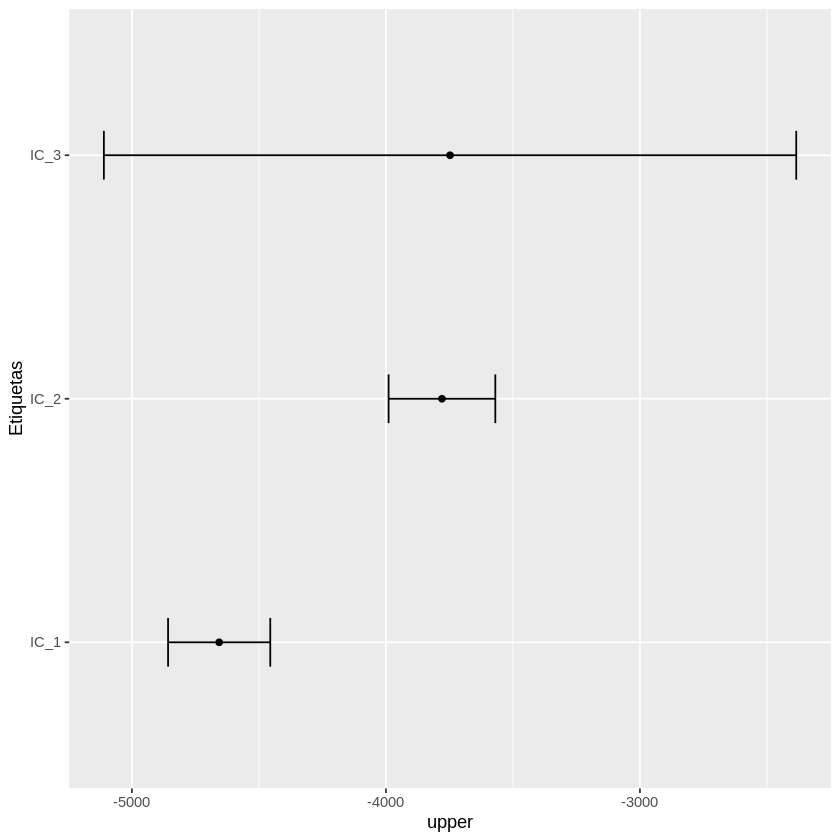

In [ ]:
#IC_1(-4857.629,	-4455.319) | IC_2(-3569.29372, -3989.49028) | IC_3(-5110.43412, -2384.57588)
# Medias 4656.47 | 3779.392 | 3747.505 



int_conf.df <- data.frame(Etiquetas = c("IC_1", "IC_2", "IC_3"), 
																mean = c(-4656.47, -3779.392, -3747.505  ), 
                                lower = c(-4857.629, -3569.29372, -5110.43412), 
																upper = c(-4455.319, -3989.49028, -2384.57588))

ggplot() + geom_errorbarh(data = int_conf.df, 
													mapping = aes(y = Etiquetas, x = upper, xmin= lower, xmax = upper), #En x puedes poner upper/lower
													height = 0.2) + 
geom_point(data = int_conf.df, 
					mapping = aes(y = Etiquetas, x = mean)) 



# RESPUESTA P_7:

##Pienso que el modelo que muestra de forma más explicita y correcta la desigualdad salarial de género en México es la de la pregunta 3 columnas 3 que podemos ver en el IC2. Aquí vemos como el intervalo no es tan amplio y que al final con un 95% de certeza las mujeres ganan menos que los hombres. El IC3 no es tan confiable porque es demasiado amplio. 


##8. Agrega la variable hijos a tu especificación de la comuna (3). Reporta el resultado de tu estimación con formato de ecuación. ¿Por qué crees que el resultado cambia tanto respecto a lo que obtendrías en la columna (3)? 

Argumenta (en la medida de lo posible respaldado con evidencia) cuál de las dos especificaciones es más correcta.

#RESPUESTA P_8:
##El resultado cambia demasiado porque para la variable hijos solo aplica para las mujeres, entonces estamos frente a una regresión que aisla de facto a los hombres. Ahora la variabilidad se hace más fuerte porque sin importar los niveles de ingreso en promedio las mujeres en México tienen un numero de hijos bastante similar.

In [ ]:
#descargamos la base otra vez pero porq la que tenemos ya esta filtrada y no queremos romperla
df_enigh_p8 <- as.data.frame(datos_enigh)
names(df_enigh_p8)

In [ ]:
#Creamos una dummy para hombre y mujer otra vez
df_enigh_p8  <- df_enigh_p8 %>% mutate(hombre = ifelse(sexo ==1,1,0) ) %>% mutate(mujer = ifelse(sexo ==2,1,0) )
names(df_enigh_p8 )
################################################
#Ajustamos la base a las variables que vamos a usar ahora le vamos a meter hijos
df_enigh_p8 <- df_enigh_p8  %>% 
  dplyr::select(sexo, ing_tri, habla_ind, hrs_trab, edad, num_trabaj, 
                escolaridad_yrs, hrs_qh, hombre, mujer, tm_40hrs, hijos)

summary(df_enigh_p8) 

[1] "v1"                 "id"                 "id_2"              
 [4] "sexo"               "edad"               "hijos"             
 [7] "parentesco"         "vive_pareja"        "escolaridad_yrs"   
[10] "integrt_hog"        "sexo_jefe"          "ubica_geo"         
[13] "estado"             "zona"               "habla_ind"         
[16] "int_habla_ind_porc" "hrs_qh"             "hrs_trab"          
[19] "log_hrs_trab"       "tm_40hrs"           "num_trabaj"        
[22] "trabajos"           "ing_tri"            "factor"            
[25] "upm"                "est_dis"            "hombre"            
[28] "mujer"

      sexo          ing_tri           habla_ind          hrs_trab    
 Min.   :1.000   Min.   :    0.48   Min.   :0.00000   Min.   :  1.0  
 1st Qu.:1.000   1st Qu.: 6971.54   1st Qu.:0.00000   1st Qu.: 25.0  
 Median :1.000   Median :14942.92   Median :0.00000   Median : 42.0  
 Mean   :1.415   Mean   :18779.09   Mean   :0.09603   Mean   : 40.1  
 3rd Qu.:2.000   3rd Qu.:24749.99   3rd Qu.:0.00000   3rd Qu.: 50.0  
 Max.   :2.000   Max.   :99963.92   Max.   :1.00000   Max.   :168.0  
                                                                     
      edad          num_trabaj   escolaridad_yrs     hrs_qh         hombre     
 Min.   : 12.00   Min.   :1.00   Min.   : 1.00   Min.   : 0.0   Min.   :0.000  
 1st Qu.: 28.00   1st Qu.:1.00   1st Qu.:10.00   1st Qu.: 0.0   1st Qu.:0.000  
 Median : 39.00   Median :1.00   Median :12.00   Median : 7.0   Median :1.000  
 Mean   : 40.11   Mean   :1.12   Mean   :12.92   Mean   :10.2   Mean   :0.585  
 3rd Qu.: 51.00   3rd Qu.:1.00   3rd Qu.

In [ ]:
#agregamos edad al cuadrado con la nueva base 
edad_ct_p8 <- df_enigh_p8$edad^2

In [ ]:
reg3_p8 <- lm(ing_tri~ mujer + escolaridad_yrs + habla_ind+ hrs_trab + edad + edad_ct_p8  + num_trabaj+ hrs_qh+hijos, df_enigh_p8)
se3 <- sqrt(diag(vcovHC(reg3_p8,type="HC1")))
reg3_p8
reg3_p3


Call:
lm(formula = ing_tri ~ mujer + escolaridad_yrs + habla_ind + 
    hrs_trab + edad + edad_ct_p8 + num_trabaj + hrs_qh + hijos, 
    data = df_enigh_p8)

Coefficients:
    (Intercept)            mujer  escolaridad_yrs        habla_ind  
     -36539.566        11868.577         1731.275        -2035.376  
       hrs_trab             edad       edad_ct_p8       num_trabaj  
        145.856          545.539           -3.691          372.553  
         hrs_qh            hijos  
        -97.906         -121.645  



Call:
lm(formula = ing_tri ~ mujer + escolaridad_yrs + habla_ind + 
    hrs_trab + edad + I(edad^2) + num_trabaj + hrs_qh, data = df_enigh)

Coefficients:
    (Intercept)            mujer  escolaridad_yrs        habla_ind  
     -25503.839        -3779.392         1653.485        -4042.224  
       hrs_trab             edad        I(edad^2)       num_trabaj  
        136.871          864.527           -7.339         -191.690  
         hrs_qh  
        -99.960  


Warning message:
“Ignoring unknown aesthetics: x”


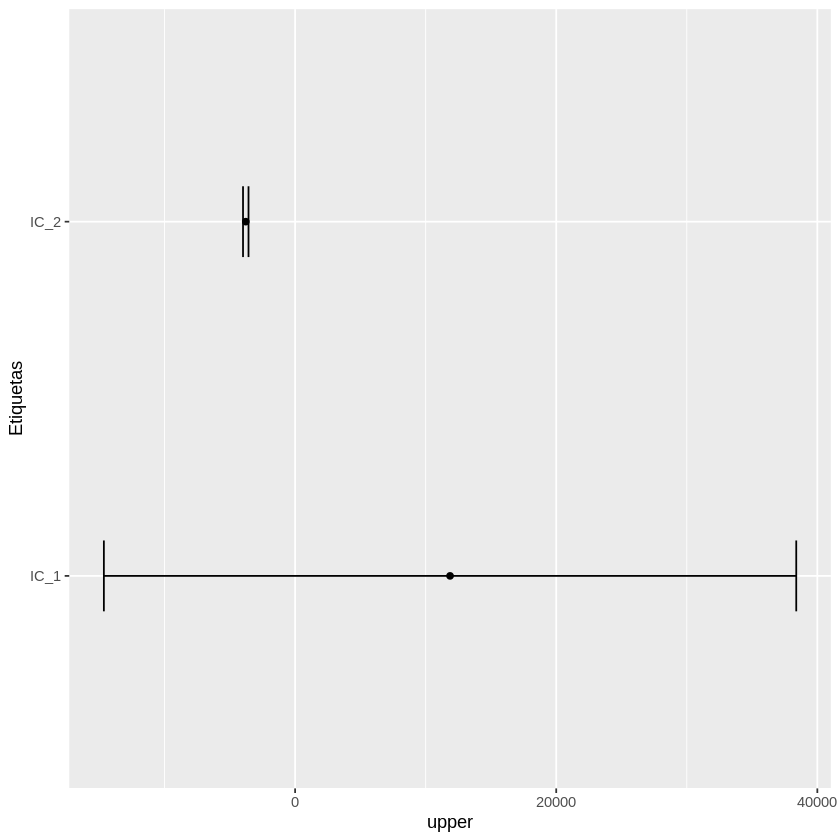

In [ ]:

int_conf.df <- data.frame(Etiquetas = c("IC_1", "IC_2"), 
																mean = c(11868.577   , -3779.392), 
                                lower = c(-14647.936356, -3569.29372), 
																upper = c(38385.08978, -3989.49028))
	
ggplot() + geom_errorbarh(data = int_conf.df, 
													mapping = aes(y = Etiquetas, x = upper, xmin= lower, xmax = upper), #En x puedes poner upper/lower
													height = 0.2) + 
geom_point(data = int_conf.df, 
					mapping = aes(y = Etiquetas, x = mean)) 


In [ ]:
confint(reg3_p3 , level=0.95)
confint(reg3_p8 , level=0.95)

,2.5 %,97.5 %
(Intercept),-26212.939360,-24794.738172
mujer,-3988.884679,-3569.898633
escolaridad_yrs,1631.030626,1675.938753
habla_ind,-4348.744351,-3735.704392
hrs_trab,132.299782,141.441981
edad,834.830807,894.223087
I(edad^2),-7.687405,-6.990757
num_trabaj,-460.856493,77.475821
hrs_qh,-109.093161,-90.825890


,2.5 %,97.5 %
(Intercept),-63118.314149,-9960.81730
mujer,-14647.936356,38385.08978
escolaridad_yrs,1691.742153,1770.80685
habla_ind,-2572.667622,-1498.08523
hrs_trab,138.414887,153.29752
edad,477.809713,613.26895
edad_ct_p8,-4.434572,-2.94700
num_trabaj,-80.774273,825.88043
hrs_qh,-109.449801,-86.36235
hijos,-232.045887,-11.24351


9. ¿Cómo se relaciona este ejercicio a un ejercicio de descomposición de Oaxaca-Blinder? Utilizando el capítulo de Fortin et al. (2011), estima el efecto estructural (∆μS) y el efecto de composici ́on (∆μX) descritos en la pp. 37, ecuaciones 14-16. Reporta el porcentaje de la diferencia de salarios que es explicado y el porcentaje no explicado.



#RESPUESTA P_8:

#Explicado: 47.57 %
#No Explicado: 52.42% 


In [ ]:
## Pregunta 9
#¿Cómo se relaciona este ejercicio a un ejercicio de descomposición de Oaxaca-Blinder?

#structure: 18222.9
#composition: 13752.36

#Explicado: 47.57 %
#No Explicado: 52.42%


#```{r}

reg_h <- lm( log(df_enigh$ing_tri) ~ df_enigh$hombre) 
reg_m <- lm( log(df_enigh$ing_tri) ~ df_enigh$mujer)

reg_h
reg_m

structure_effect <- mean(df_enigh$ing_tri)*(0.4108+0.4108)
composition_effect <- mean(df_hombres$ing_tri)-mean(df_mujeres$ing_tri)*(0.4108)


structure_effect 
composition_effect
 #suma 15976.9157932892 + 14496.6832581616

 #Explicado: 15976.9157932892/30473.5990514508
  #No explicado: 14496.6832581616/30473.5990514508


Call:
lm(formula = log(df_enigh$ing_tri) ~ df_enigh$hombre)

Coefficients:
    (Intercept)  df_enigh$hombre  
         9.1902           0.4108  



Call:
lm(formula = log(df_enigh$ing_tri) ~ df_enigh$mujer)

Coefficients:
   (Intercept)  df_enigh$mujer  
        9.6010         -0.4108  


[1] 15976.92

[1] 14496.68